In [188]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [189]:
MY_PC = '.'
MY_DRIVE = '/content/drive/MyDrive/KFUPM/ICS485 Machine Learning/machine-learning'


working_on = MY_PC

# Reading the data

In [190]:
# Reading the data
df = pd.read_csv(working_on + "/Dataset-vf.csv")

In [191]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


,Column,Non-Null Count,Non-Null %,Dtype,Unique Values,Mean
Y,Y,6124,100.00 %,object,6,NaN
X1,X1,6124,100.00 %,int64,1395,2645.712933
X2,X2,5520,90.14 %,float64,360,151.293659
X3,X3,6124,100.00 %,int64,50,16.794579
X4,X4,6124,100.00 %,int64,257,192.488080
X5,X5,6124,100.00 %,int64,324,47.550621
X6,X6,6124,100.00 %,int64,2037,1541.308459
X7,X7,6124,100.00 %,int64,169,216.777106
X8,X8,6124,100.00 %,int64,137,218.770411
X9,X9,6124,100.00 %,int64,243,129.345852


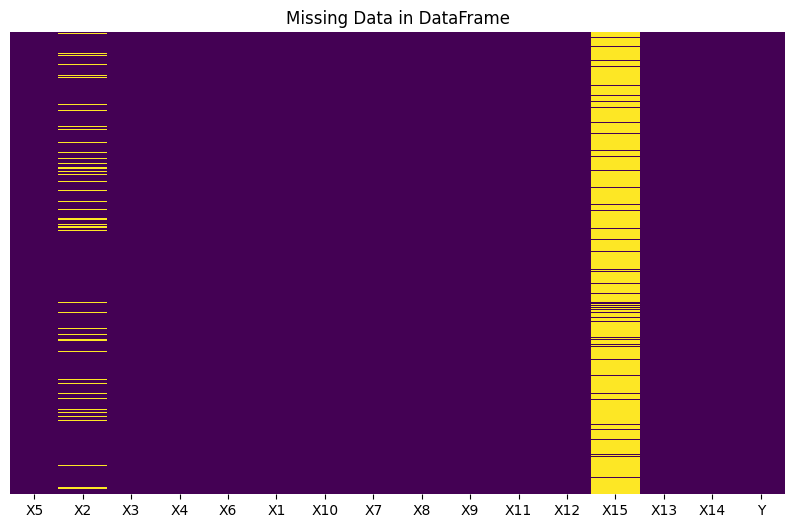

In [192]:
def display_dataframe_summary(dataframe, sort_by='Column'):
    # Select only numeric columns for calculating the sum
    numeric_df = dataframe.select_dtypes(include=[np.number])

    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.notnull().sum(),
        'Non-Null %': (100 * dataframe.notnull().sum() / len(dataframe)).map("{:.2f} %".format),
        'Dtype': dataframe.dtypes,
        'Unique Values': dataframe.nunique()
    })

    # Add a condition to check if numeric_df is not empty
    if not numeric_df.empty:
        summary['Mean'] = numeric_df.mean()

    # Extracting numerical part from column names for sorting
    summary['Sort Key'] = summary['Column'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Sorting the summary DataFrame
    if sort_by == 'Column':
        summary = summary.sort_values(by='Sort Key', ascending=True)
    else:
        summary = summary.sort_values(by=sort_by, ascending=True)

    summary = summary.drop('Sort Key', axis=1)  # Remove the auxiliary sort key column

    # Display the summary
    display(summary)

    # Plotting missing data
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Data in DataFrame')
    plt.show()

# Call the function with your DataFrame
display_dataframe_summary(df, sort_by='Column')


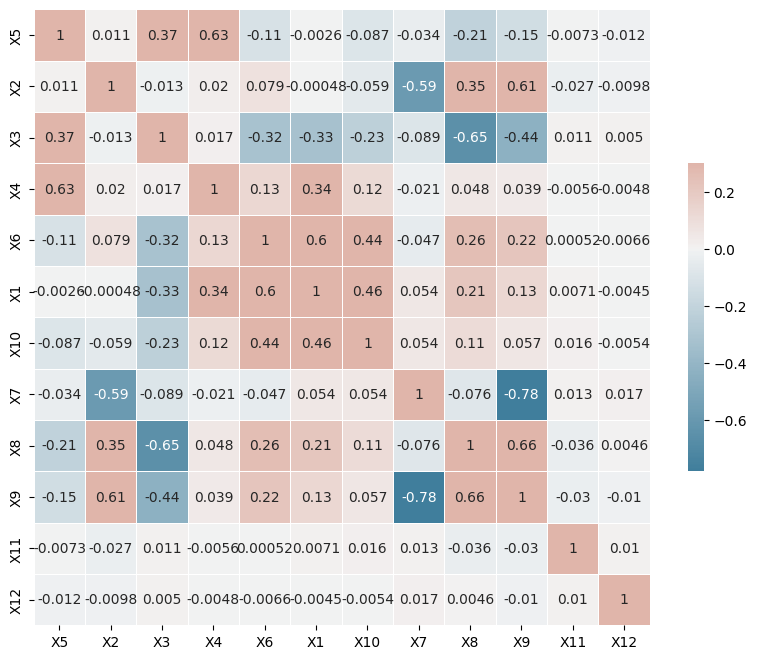

In [193]:
numerical_features = df.select_dtypes(include='number')

# Calculating the correlation matrix for the numerical columns
correlation_matrix = numerical_features.corr()


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [194]:
classes = df["Y"].unique()
number_of_classes = df["Y"].nunique()
print(f"The classes is: {classes}")
print(f"Number of classes: {number_of_classes}")

The classes is: ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']
Number of classes: 6


# Preprocessing the Data

In [195]:
X = df.drop(columns = ['Y'])  
y = df['Y'].to_frame("Y")              

In [196]:
categorical_cols_features = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_features: 
    print(f"Available labels in {col}: {X[col].unique()}")
    for label in X[col].unique():
        print(f"Label {label} count: {len(X[col][X[col] == label])}")
    print()

Available labels in X15: ['R1' nan 'R2' 'R3' 'R']
Label R1 count: 181
Label nan count: 0
Label R2 count: 190
Label R3 count: 229
Label R count: 1

Available labels in X13: [' FC11' ' FC14' ' FC13' ' FC12']
Label  FC11 count: 1786
Label  FC14 count: 2585
Label  FC13 count: 1729
Label  FC12 count: 24

Available labels in X14: [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34' ' CA41' ' CA48' ' CA54' ' CA55']
Label  CA49 count: 586
Label  CA50 count: 436
Label  CA26 count: 374
Label  CA32 count: 43
Label  CA38 count: 45
Label  CA42 count: 134
Label  CA37 count: 374
Label  CA23 count: 666
Label  CA24 count: 348
Label  CA21 count: 192
Label  CA43 count: 388
Label  CA22 count: 260
Label  CA36 count: 51
Label  CA33 count: 240
Label  CA44 count: 69
Label  CA59 count: 143
Label  CA30 count: 682
Label  CA51 count: 127
Lab

### Removing samples with rare labels in X

In [197]:
X = X.loc[X["X15"] != "R"]
X = X.loc[X["X14"] != " CA55"]
X = X.loc[X["X14"] != " CA54"]
X = X.loc[X["X14"] != " CA48"]
X = X.loc[X["X14"] != " CA41"]
X = X.loc[X["X13"] != " FC12 "]

# Get the indices of the remaining rows in X
remaining_indices = X.index
y = y.loc[remaining_indices]


In [198]:
for col in categorical_cols_features: 
    print(f"Available labels in {col}: {X[col].unique()}")
    for label in X[col].unique():
        print(f"Label {label} count: {len(X[col][X[col] == label])}")
    print()

Available labels in X15: ['R1' nan 'R2' 'R3']
Label R1 count: 181
Label nan count: 0
Label R2 count: 190
Label R3 count: 229

Available labels in X13: [' FC11' ' FC14' ' FC13' ' FC12']
Label  FC11 count: 1785
Label  FC14 count: 2584
Label  FC13 count: 1714
Label  FC12 count: 24

Available labels in X14: [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34']
Label  CA49 count: 586
Label  CA50 count: 436
Label  CA26 count: 374
Label  CA32 count: 43
Label  CA38 count: 45
Label  CA42 count: 134
Label  CA37 count: 373
Label  CA23 count: 666
Label  CA24 count: 348
Label  CA21 count: 192
Label  CA43 count: 388
Label  CA22 count: 260
Label  CA36 count: 51
Label  CA33 count: 240
Label  CA44 count: 69
Label  CA59 count: 143
Label  CA30 count: 682
Label  CA51 count: 127
Label  CA52 count: 224
Label  CA31 count: 172
Label  CA4

In [199]:
tmp = pd.get_dummies(X.drop("X15", axis=1), dtype="int64")
X = pd.concat([tmp, X["X15"]], axis=1)

In [200]:
X.shape, y.shape

((6107, 45), (6107, 1))

In [201]:
display(X)
display(y)

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA46,X14_ CA49,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA58,X14_ CA59,X14_ CA60,X15
0,43,59.0,11,120,150,2709,2114,228,217,120,...,0,1,0,0,0,0,0,0,0,R1
1,0,54.0,7,0,693,2802,162,224,225,136,...,0,0,1,0,0,0,0,0,0,NaN
2,0,28.0,12,0,1260,2325,162,215,213,133,...,0,0,0,0,0,0,0,0,0,NaN
3,16,112.0,8,272,3649,2837,6221,235,231,128,...,0,0,0,0,0,0,0,0,0,NaN
4,10,59.0,7,134,900,2509,5184,226,226,134,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,14,NaN,18,67,918,2712,1922,201,254,183,...,0,0,0,0,0,0,0,0,0,NaN
6120,1,67.0,6,170,824,3101,1657,227,228,135,...,0,0,0,0,0,0,0,0,0,NaN
6121,-3,139.0,13,30,3127,3050,5770,240,235,123,...,0,0,0,0,0,0,0,0,0,NaN
6122,12,106.0,24,30,582,2080,108,252,202,64,...,0,0,0,0,0,0,0,0,0,NaN


,Y
0,BMW
1,BMW
2,Mercedes
3,Ford
4,BMW
...,...
6119,Toyota
6120,Toyota
6121,Toyota
6122,Mercedes


### Splitting data into Train, Val, Test.

In [202]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=777)

len(X_train), len(X_val), len(X_test)


(4274, 916, 917)

### Apply some preprocessing techniques like stander normlization using Pipepline

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



numerical_cols = X_train.select_dtypes(include='number').columns


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])



### Handling numerical missing values

In [204]:
mean = X_train['X2'].mean()

X_train['X2'] = X_train['X2'].fillna(mean)
X_val['X2'] = X_val['X2'].fillna(mean)
X_test['X2'] = X_test['X2'].fillna(mean)

print("Missing values in 'X2' column of X_train:", X_train['X2'].isnull().sum())
print("Missing values in 'X2' column of X_val:", X_val['X2'].isnull().sum())
print("Missing values in 'X2' column of X_test:", X_test['X2'].isnull().sum())


Missing values in 'X2' column of X_train: 0
Missing values in 'X2' column of X_val: 0
Missing values in 'X2' column of X_test: 0


In [205]:
X_train.shape, X_val.shape

((4274, 45), (916, 45))

### Semi-Supervised Learning Imputation (to fill categorical missing values)

**MCAR:** is the highest level of randomness and occurs where
missingness of attribute values is independent of the values

**MAR:** occurs when the probability of a case having
a missing value may depend on the known values, but not on the value of the
missing data itself

**NMAR:** occurs when the probability of a case having a missing value for an attribute could depend on the
value of that attribute.


Case and attribute removal with missing data should be applied only if
missing data are MCAR, as not MCAR missing data have non-random elements,
which can make the results biased.

In [206]:
y_train.shape, X_train.shape

((4274, 1), (4274, 45))

In [207]:
mask = pd.isna(X_train["X15"])

# Apply the mask to both X_train and y_train
labeled_X = X_train[~mask]
labeled_y = y_train[~mask]
labeled = pd.concat([labeled_X, labeled_y], axis=1)  # Rows where X15 is not NaN

unlabeled_X = X_train[mask]
unlabeled_y = y_train[mask]
unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)   # Rows where X15 is NaN


labeled = pd.get_dummies(labeled, columns = ["Y"], dtype="int64")
unlabeled = pd.get_dummies(unlabeled, columns = ["Y"], dtype="int64")



print(f"number of labeled data: {len(labeled)}, and number of features: {len(labeled.columns)}")
print(f"number of unlabeled data: {len(unlabeled)}, and number of features: {len(unlabeled.columns)}")
print(f"labeled + unlabeled: {len(labeled) + len(unlabeled)}")


number of labeled data: 433, and number of features: 51
number of unlabeled data: 3841, and number of features: 51
labeled + unlabeled: 4274


In [208]:
display(labeled.sample(1))
display(unlabeled.sample(1))

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
4549,0,27.0,5,67,4607,2952,2315,218,228,147,...,0,0,0,R1,1,0,0,0,0,0


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
1100,75,158.0,27,150,1148,2200,534,237,232,107,...,0,0,0,NaN,0,0,0,0,1,0


In [209]:
X15_features_labeled = labeled.drop('X15', axis=1)
X15_values_labeled = labeled['X15']

X15_features_unlabeled = unlabeled.drop('X15', axis=1)
X15_values_unlabeled = unlabeled['X15']

print(f"X_label and Y_label length before using Semi-Supervised: {len(X15_features_labeled)}")
print(f"Unlabeled data len: {len(X15_features_unlabeled)}")


X_label and Y_label length before using Semi-Supervised: 433
Unlabeled data len: 3841


In [210]:
X15_values_labeled.shape

(433,)

In [211]:
print(f"Available labels: {X15_values_labeled.unique()}")
for label in X15_values_labeled.unique():
    print(f"Label {label} count: {len(X15_values_labeled[X15_values_labeled == label])}")

Available labels: ['R3' 'R1' 'R2']
Label R3 count: 177
Label R1 count: 128
Label R2 count: 128


In [212]:
X15_features_unlabeled

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA53,X14_ CA58,X14_ CA59,X14_ CA60,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
170,99,150.890098,22,351,474,2856,1383,229,189,82,...,0,0,0,0,1,0,0,0,0,0
4469,47,209.000000,28,124,1320,2843,2742,187,252,185,...,0,0,0,0,1,0,0,0,0,0
3583,0,150.890098,12,0,931,2271,417,213,215,137,...,0,0,0,0,0,0,0,0,1,0
3446,1,137.000000,19,30,591,2038,636,246,229,104,...,0,0,0,0,0,0,0,0,1,0
2201,0,65.000000,7,0,537,2384,1381,227,226,134,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,57,150.890098,20,182,351,2367,636,237,196,82,...,0,0,0,0,0,0,0,1,0,0
5806,128,102.000000,33,212,525,2196,190,253,177,23,...,0,0,0,0,0,0,0,0,1,0
2128,-26,121.000000,18,127,532,2767,297,247,223,97,...,0,0,0,0,1,0,0,0,0,0
4029,60,55.000000,26,297,698,2423,693,225,174,66,...,0,0,0,0,0,0,0,1,0,0


In [213]:


X_train_labeled, X_val_labeled, y_train_labeled, y_val_labeled = train_test_split(
    X15_features_labeled, X15_values_labeled, test_size=0.15, random_state=777)

model = MLPClassifier(random_state=777, max_iter=1000, solver='adam', hidden_layer_sizes=(100,))

model.fit(X_train_labeled, y_train_labeled)

# Initialize lists to store F1-scores
f1_scores_train = []
f1_scores_val = []
epoch = 1
while len(X15_features_unlabeled) > 0:
    probas = model.predict_proba(X15_features_unlabeled)
    predictions = model.predict(X15_features_unlabeled)

    sure_indices = [i for i, probabilities in enumerate(probas) if max(probabilities) > 0.99]

    if len(sure_indices) == 0:
        break

    sure_samples = X15_features_unlabeled.iloc[sure_indices]
    sure_labels = pd.Series(predictions[sure_indices], index=sure_samples.index)

    X_train_labeled = pd.concat([X_train_labeled, sure_samples])
    y_train_labeled = pd.concat([y_train_labeled, sure_labels])

    X15_features_unlabeled = X15_features_unlabeled.drop(sure_samples.index)

    model.fit(X_train_labeled, y_train_labeled)

    # Calculate and store F1-scores
    train_predictions = model.predict(X_train_labeled)
    val_predictions = model.predict(X_val_labeled)

    train_f1 = f1_score(y_train_labeled, train_predictions, average='macro')
    val_f1 = f1_score(y_val_labeled, val_predictions, average='macro')
    print(f"Train F1 score: {train_f1:.2f}")
    print(f"Validation F1 score: {val_f1:.2f}")
    print(f"Samples labeled in epoch {epoch}: {len(sure_indices)}")
    print(f"X trainin new shape: {X_train_labeled.shape}\n")

    f1_scores_train.append(train_f1)
    f1_scores_val.append(val_f1)

    epoch += 1

print(f"X_label and Y_label length after using Semi-Supervised: {len(X_train_labeled)}")
print(f"Unlabeled data len: {len(X15_features_unlabeled)}")


Train F1 score: 0.59
Validation F1 score: 0.32
Samples labeled in epoch 1: 1876
X trainin new shape: (2244, 50)

Train F1 score: 0.82
Validation F1 score: 0.30
Samples labeled in epoch 2: 1135
X trainin new shape: (3379, 50)

Train F1 score: 0.87
Validation F1 score: 0.33
Samples labeled in epoch 3: 146
X trainin new shape: (3525, 50)

Train F1 score: 0.75
Validation F1 score: 0.29
Samples labeled in epoch 4: 48
X trainin new shape: (3573, 50)

Train F1 score: 0.78
Validation F1 score: 0.29
Samples labeled in epoch 5: 280
X trainin new shape: (3853, 50)

Train F1 score: 0.88
Validation F1 score: 0.33
Samples labeled in epoch 6: 22
X trainin new shape: (3875, 50)

Train F1 score: 0.74
Validation F1 score: 0.39
Samples labeled in epoch 7: 12
X trainin new shape: (3887, 50)

Train F1 score: 0.82
Validation F1 score: 0.30
Samples labeled in epoch 8: 201
X trainin new shape: (4088, 50)

Train F1 score: 0.74
Validation F1 score: 0.32
Samples labeled in epoch 9: 1
X trainin new shape: (4089, 

In [214]:
len(f1_scores_val),len(f1_scores_train) 

(14, 14)

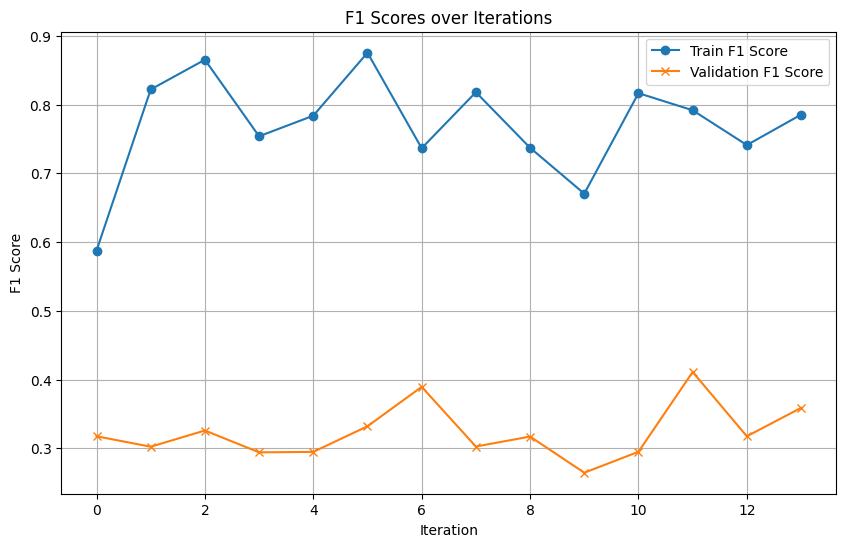

In [215]:
# Plotting the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1_scores_train)), f1_scores_train, label='Train F1 Score', marker='o')
plt.plot(range(len(f1_scores_val)), f1_scores_val, label='Validation F1 Score', marker='x')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.title('F1 Scores over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [216]:
X15_features_labeled = pd.concat([X_train_labeled, X_val_labeled])
X15_values_labeled = pd.concat([y_train_labeled, y_val_labeled])

#### Updating X_train, X_val, and X_test with the new X15 column

In [217]:
def process_data(X, y, model, feature_name):
    # Mask for missing values in the specified feature
    mask = pd.isna(X[feature_name])

    # Labeled Data
    labeled_X = X[~mask]
    labeled_y = y[~mask]
    labeled_y = pd.get_dummies(labeled_y,  dtype="int64")
    labeled = pd.concat([labeled_X, labeled_y], axis=1)

    # Unlabeled Data
    unlabeled_X = X[mask]
    unlabeled_y = y[mask]
    unlabeled_y = pd.get_dummies(unlabeled_y, dtype="int64")

    unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)
    X_unlabeled = unlabeled.drop(feature_name, axis=1)

    # Predict and fill missing values
    X.loc[mask, feature_name] = model.predict(X_unlabeled)


    return labeled, unlabeled

# Process training data
columns_to_drop = ['Y_BMW', 'Y_Ford', 'Y_GMC', 'Y_Honda', 'Y_Mercedes', 'Y_Toyota']
X15_features_labeled = X15_features_labeled.drop(columns=columns_to_drop, axis=1)
X_train = pd.concat([X15_features_labeled, X15_values_labeled.to_frame(name='X15')], axis = 1)
y_train = y_train.loc[X_train.index]

# Process validation data
val_labeled, val_unlabeled = process_data(X_val, y_val, model, 'X15')

# Process testing data
test_labeled, test_unlabeled = process_data(X_test, y_test, model, 'X15')

# Print lengths
print(f"number of train labeled data: {len(X15_features_labeled)}")
print(f"number of val labeled data: {len(val_labeled)}")
print(f"number of test labeled data: {len(test_labeled)}")


number of train labeled data: 4250
number of val labeled data: 89
number of test labeled data: 78


In [218]:
X_train

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA46,X14_ CA49,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA58,X14_ CA59,X14_ CA60,X15
1982,0,18.000000,28,0,1207,2156,960,187,170,107,...,0,0,0,0,0,0,0,0,0,R3
4968,32,96.000000,29,108,942,2771,1370,251,185,41,...,0,0,0,0,0,0,0,0,0,R2
2807,29,150.890098,17,85,649,2304,779,246,225,101,...,0,0,0,0,0,0,0,0,0,R3
3353,15,111.000000,28,30,391,2081,663,254,197,50,...,0,0,0,0,0,0,0,0,0,R1
2228,129,100.000000,25,309,582,2350,1725,251,198,59,...,0,0,0,0,0,0,0,0,0,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,4,150.890098,12,323,360,2795,649,237,218,110,...,0,0,1,0,0,0,0,0,0,R3
2649,143,67.000000,23,324,342,2943,1368,235,188,73,...,0,1,0,0,0,0,0,0,0,R1
183,26,100.000000,13,277,2630,3352,2475,241,222,110,...,0,0,0,0,0,0,0,1,0,R1
1341,197,67.000000,22,600,626,2871,2391,236,192,77,...,0,0,0,0,0,0,0,0,0,R1


In [219]:
X_train = pd.get_dummies(X_train, columns = ["X15"],  dtype="int64")
X_val = pd.get_dummies(X_val, columns = ["X15"],  dtype="int64")
X_test = pd.get_dummies(X_test, columns = ["X15"],  dtype="int64")

### Upsampling 

In [220]:
categorical_cols_labels = y_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_labels: 
    print(f"Available labels in {col}: {y_train[col].unique()}")
    for label in y_train[col].unique():
        print(f"Label {label} count: {len(y_train[col][y_train[col] == label])}")
    print()

Available labels in Y: ['Mercedes' 'BMW' 'Honda' 'Toyota' 'GMC' 'Ford']
Label Mercedes count: 1114
Label BMW count: 1119
Label Honda count: 849
Label Toyota count: 892
Label GMC count: 209
Label Ford count: 67



In [221]:

sm = SMOTE(random_state=777)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [222]:

for col in categorical_cols_labels: 
    print(f"Available labels in {col}: {y_train[col].unique()}")
    for label in y_train[col].unique():
        print(f"Label {label} count: {len(y_train[col][y_train[col] == label])}")
    print()

Available labels in Y: ['Mercedes' 'BMW' 'Honda' 'Toyota' 'GMC' 'Ford']
Label Mercedes count: 1119
Label BMW count: 1119
Label Honda count: 1119
Label Toyota count: 1119
Label GMC count: 1119
Label Ford count: 1119



In [223]:
X_train.shape, X_val.shape, X_test.shape

((6714, 47), (916, 47), (917, 47))

In [224]:
X_test

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA58,X14_ CA59,X14_ CA60,X15_R1,X15_R2,X15_R3
2811,33,63.0,4,283,2555,3041,908,224,231,143,...,0,0,0,0,0,0,0,0,0,1
3942,0,45.0,7,0,932,2790,2527,222,225,138,...,0,0,0,0,0,0,0,0,1,0
1988,114,161.0,9,457,1401,2272,892,230,242,144,...,0,0,0,0,0,0,0,1,0,0
1465,0,21.0,7,0,2802,3356,2222,215,224,146,...,0,0,0,0,1,0,0,0,0,1
2141,11,51.0,12,95,3247,3096,1348,226,213,119,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,155,335.0,27,212,738,2267,234,149,192,176,...,0,0,0,0,0,0,0,1,0,0
5205,7,193.0,14,108,4726,3265,2831,218,250,163,...,0,0,0,1,0,0,0,0,1,0
5335,4,340.0,5,30,947,3137,1974,210,233,162,...,0,0,0,0,0,0,0,1,0,0
4342,110,197.0,33,242,598,2129,324,191,245,164,...,0,0,0,0,0,0,0,1,0,0


### Applying the pipeline

In [225]:
selected_columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12"]  # The columns to transform
transformed_train = pipeline.fit_transform(X_train[selected_columns])

transformed_train_df = pd.DataFrame(transformed_train, index=X_train.index, columns=selected_columns)
X_train = pd.concat([transformed_train_df, X_train.drop(columns=selected_columns)], axis=1)

transformed_val = pipeline.transform(X_val[selected_columns])
transformed_test = pipeline.transform(X_test[selected_columns])

transformed_val_df = pd.DataFrame(transformed_val, index=X_val.index, columns=selected_columns)
X_val = pd.concat([transformed_val_df, X_val.drop(columns=selected_columns)], axis=1)

transformed_test_df = pd.DataFrame(transformed_test, index=X_test.index, columns=selected_columns)
X_test = pd.concat([transformed_test_df, X_test.drop(columns=selected_columns)], axis=1)

In [226]:
X_train["X12"].std()

1.0000744795740801

In [227]:
X_train.columns, X_test.columns

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13_ FC11', 'X13_ FC12', 'X13_ FC13', 'X13_ FC14', 'X14_ CA21',
        'X14_ CA22', 'X14_ CA23', 'X14_ CA24', 'X14_ CA25', 'X14_ CA26',
        'X14_ CA30', 'X14_ CA31', 'X14_ CA32', 'X14_ CA33', 'X14_ CA34',
        'X14_ CA36', 'X14_ CA37', 'X14_ CA38', 'X14_ CA39', 'X14_ CA40',
        'X14_ CA42', 'X14_ CA43', 'X14_ CA44', 'X14_ CA46', 'X14_ CA49',
        'X14_ CA50', 'X14_ CA51', 'X14_ CA52', 'X14_ CA53', 'X14_ CA58',
        'X14_ CA59', 'X14_ CA60', 'X15_R1', 'X15_R2', 'X15_R3'],
       dtype='object'),
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13_ FC11', 'X13_ FC12', 'X13_ FC13', 'X13_ FC14', 'X14_ CA21',
        'X14_ CA22', 'X14_ CA23', 'X14_ CA24', 'X14_ CA25', 'X14_ CA26',
        'X14_ CA30', 'X14_ CA31', 'X14_ CA32', 'X14_ CA33', 'X14_ CA34',
        'X14_ CA36', 'X14_ CA37', 'X14_ CA38', 'X14_ CA39', 'X14_ CA40',
        'X14_ C

In [228]:
print(f"train shape (X, y): {((X_train.shape), (y_train.shape))}")
print(f"Length val (X, y): {((X_val.shape), (y_val.shape))}")
print(f"Length test (X, y): {((X_test.shape), (y_test.shape))}")

train shape (X, y): ((6714, 47), (6714, 1))
Length val (X, y): ((916, 47), (916, 1))
Length test (X, y): ((917, 47), (917, 1))


### Feature Selection

In [229]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Your existing code
print(f"X train shape before: {X_train.shape}")
print(f"X val shape before: {X_val.shape}")
print(f"X test shape before: {X_test.shape}")
X_train_original_columns = X_train.columns


clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_val = model.transform(X_val)
X_test = model.transform(X_test)

selected_features = X_train_original_columns[model.get_support()]

X_train = pd.DataFrame(X_train, columns=selected_features)
X_val = pd.DataFrame(X_val, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)


print(f"X train shape after: {X_train.shape}")
print(f"X val shape after: {X_val.shape}")
print(f"X test shape after: {X_test.shape}")


X train shape before: (6714, 47)
X val shape before: (916, 47)
X test shape before: (917, 47)


c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


X train shape after: (6714, 16)
X val shape after: (916, 16)
X test shape after: (917, 16)


c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [230]:
# Verify and reset index for training data
if not X_train.index.equals(y_train.index):
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

# Verify and reset index for validation data
if not X_val.index.equals(y_val.index):
    X_val.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
val_data = pd.concat([X_val, y_val], axis=1)

# Verify and reset index for test data
if not X_test.index.equals(y_test.index):
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
test_data = pd.concat([X_test, y_test], axis=1)


assert all(X_train.index == y_train.index), "Indexes of X_train and y_train do not match."
assert all(X_val.index == y_val.index), "Indexes of X_val and y_val do not match."
assert all(X_test.index == y_test.index), "Indexes of X_test and y_test do not match."



In [231]:
directory = "preprocessed_data"

if not os.path.exists(directory):
    os.makedirs(directory)

train_data.to_csv(working_on + '/preprocessed_data/train_data.csv', index=False)
val_data.to_csv(working_on + '/preprocessed_data/val_data.csv', index=False)
test_data.to_csv(working_on + '/preprocessed_data/test_data.csv', index=False)

In [232]:
train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X13_ FC11,X13_ FC13,X13_ FC14,X14_ CA23,X14_ CA50,X14_ CA59,Y
0,-1.520449,-1.428585,1.530877,-1.162058,-0.836349,-0.535183,-1.042610,-2.433676,-0.612921,-0.707368,0.0,0.0,1.0,0.0,0.0,0.0,Mercedes
1,0.019717,-0.578489,1.649464,-0.522458,-0.204228,-0.694313,1.210780,-1.719345,-2.155114,-0.453929,0.0,1.0,0.0,0.0,0.0,0.0,BMW
2,-1.149807,0.019739,0.226418,-0.658669,-0.263490,-0.870256,1.034734,0.185537,-0.753121,-0.819252,0.0,0.0,1.0,0.0,0.0,0.0,Honda
3,-1.708274,-0.415010,1.530877,-0.984392,-0.540042,-1.025183,1.316407,-1.147880,-1.944815,-0.890957,0.0,0.0,1.0,0.0,0.0,0.0,Honda
4,-1.034608,-0.534895,1.175115,0.667908,1.711888,-0.910489,1.210780,-1.100258,-1.734516,-0.234488,0.0,0.0,1.0,1.0,0.0,0.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,0.698392,0.978494,-0.840867,0.282964,0.190847,0.280282,-0.760937,0.947490,1.186303,-0.729003,1.0,0.0,0.0,0.0,0.0,0.0,Toyota
6710,0.640792,0.022819,-0.485105,0.875186,-0.342505,1.495072,0.048875,0.090293,0.134808,0.613606,1.0,0.0,0.0,0.0,0.0,0.0,Toyota
6711,1.189242,1.566031,-1.196628,-1.138370,-0.816595,1.389386,-0.373635,0.709380,0.812439,-0.963898,1.0,0.0,0.0,0.0,0.0,0.0,Toyota
6712,1.226807,1.638275,-0.485105,3.528342,2.324254,-0.038578,-0.655309,0.233159,0.765705,-0.020610,0.0,1.0,0.0,0.0,0.0,0.0,Toyota
